In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
msft = yf.Ticker("MSFT")


In [ ]:
msft.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-03-21 00:00:00-04:00,274.880005,275.000000,269.519989,273.779999,34558700,0.0,0.0
2023-03-22 00:00:00-04:00,273.399994,281.040009,272.179993,272.290009,34873300,0.0,0.0
2023-03-23 00:00:00-04:00,277.940002,281.059998,275.200012,277.660004,36610900,0.0,0.0
2023-03-24 00:00:00-04:00,277.239990,280.630005,275.279999,280.570007,28172000,0.0,0.0
2023-03-27 00:00:00-04:00,280.500000,281.459991,275.519989,276.380005,26808900,0.0,0.0


In [ ]:
df=msft.history(start='2001-01-19', end='2023-02-19', actions=False)

In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,18.716947,19.165374,18.366004,19.028896,209348800
2001-01-22 00:00:00-05:00,18.950910,19.028897,18.404999,18.755941,76673000
2001-01-23 00:00:00-05:00,18.638955,19.009395,18.385497,18.892414,70295200
2001-01-24 00:00:00-05:00,19.028903,19.789279,18.950916,19.633305,110455000
2001-01-25 00:00:00-05:00,19.574818,19.964755,19.204378,19.282366,85657400
...,...,...,...,...,...
2023-02-13 00:00:00-05:00,266.971322,273.913924,266.482526,270.642120,44630900
2023-02-14 00:00:00-05:00,271.988772,274.283013,268.607227,271.490021,37047900
2023-02-15 00:00:00-05:00,268.320007,270.730011,266.179993,269.320007,28922400


In [ ]:
df.index

DatetimeIndex(['2001-01-19 00:00:00-05:00', '2001-01-22 00:00:00-05:00',
               '2001-01-23 00:00:00-05:00', '2001-01-24 00:00:00-05:00',
               '2001-01-25 00:00:00-05:00', '2001-01-26 00:00:00-05:00',
               '2001-01-29 00:00:00-05:00', '2001-01-30 00:00:00-05:00',
               '2001-01-31 00:00:00-05:00', '2001-02-01 00:00:00-05:00',
               ...
               '2023-02-06 00:00:00-05:00', '2023-02-07 00:00:00-05:00',
               '2023-02-08 00:00:00-05:00', '2023-02-09 00:00:00-05:00',
               '2023-02-10 00:00:00-05:00', '2023-02-13 00:00:00-05:00',
               '2023-02-14 00:00:00-05:00', '2023-02-15 00:00:00-05:00',
               '2023-02-16 00:00:00-05:00', '2023-02-17 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5556, freq=None)

In [ ]:
df.shape

(5556, 5)

In [ ]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [ ]:
df.head()

,Close
Date,
2001-01-19 00:00:00-05:00,19.028896
2001-01-22 00:00:00-05:00,18.755941
2001-01-23 00:00:00-05:00,18.892414
2001-01-24 00:00:00-05:00,19.633305
2001-01-25 00:00:00-05:00,19.282366


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

Text(0.5, 0, 'Time')

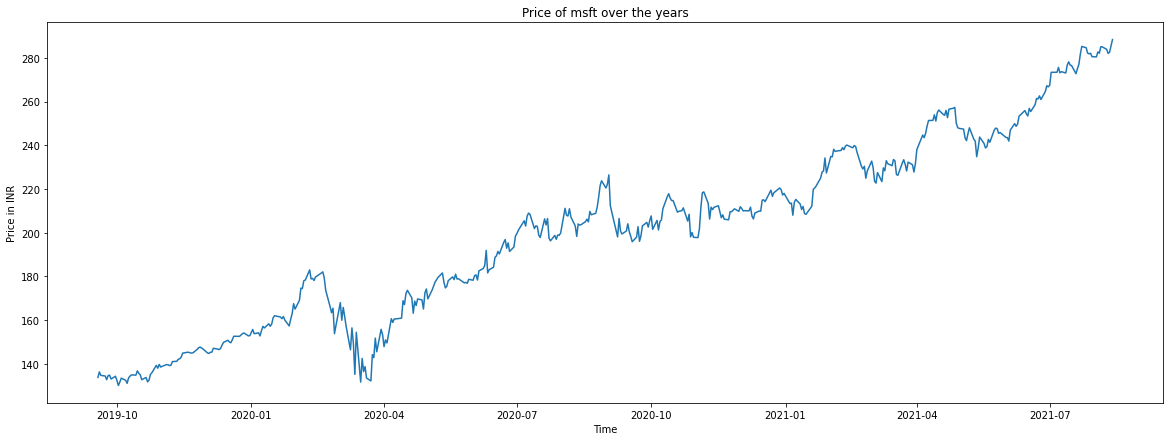

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Price of msft over the years")
plt.plot(df['2019-09-18':'2021-08-14'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

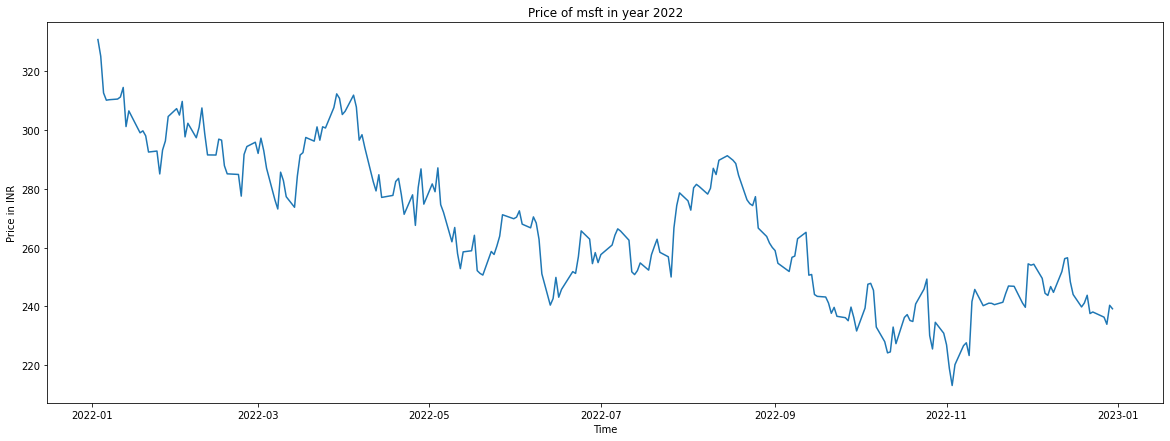

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Price of msft in year 2022")
plt.plot(df['2022-01-01':'2023-01-01'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [ ]:
data=df.values

In [ ]:
data

array([[ 19.02889633],
       [ 18.75594139],
       [ 18.89241409],
       ...,
       [269.32000732],
       [262.1499939 ],
       [258.05999756]])

In [ ]:
len(data)

5556

In [ ]:
import math

In [ ]:
train_len=math.ceil(len(data)*0.92)

In [ ]:
train_len

5112

In [ ]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data=min_max_scalar.fit_transform(data)

In [ ]:
len(scaled_data)

5556

In [ ]:
scaled_data

array([[0.0233523 ],
       [0.02251936],
       [0.02293581],
       ...,
       [0.78713541],
       [0.76525555],
       [0.7527746 ]])

In [ ]:
train_data=scaled_data[0:train_len,:]

In [ ]:
len(train_data)

5112

In [ ]:
len(train_data)

5112

In [ ]:
interval=60

In [ ]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train

[array([0.0233523 , 0.02251936, 0.02293581, 0.0251967 , 0.02412578,
        0.02620811, 0.02668411, 0.02561316, 0.02341179, 0.02466121,
        0.0231738 , 0.02424473, 0.0248397 , 0.02686258, 0.02454221,
        0.02156743, 0.02121044, 0.02067498, 0.02085346, 0.02126994,
        0.01984204, 0.01847361, 0.01883061, 0.01781915, 0.01930656,
        0.02198386, 0.02180541, 0.02144843, 0.02179054, 0.01924706,
        0.01996102, 0.02186491, 0.02305481, 0.02168641, 0.01924706,
        0.01472538, 0.01686723, 0.01668874, 0.01639125, 0.01722422,
        0.01698623, 0.01543933, 0.01294048, 0.01668874, 0.01912809,
        0.01865209, 0.02073447, 0.01817615, 0.01799764, 0.01734319,
        0.01841413, 0.01609377, 0.01472538, 0.01930656, 0.0187711 ,
        0.01968735, 0.02209576, 0.02243845, 0.02447558, 0.0231524 ]),
 array([0.02251936, 0.02293581, 0.0251967 , 0.02412578, 0.02620811,
        0.02668411, 0.02561316, 0.02341179, 0.02466121, 0.0231738 ,
        0.02424473, 0.0248397 , 0.02686258, 0.

In [ ]:
y_train

[0.023809220246636384,
 0.027569401141491888,
 0.030053925278563584,
 0.030967807691267515,
 0.03025385106174057,
 0.029587482228168524,
 0.031624642668458186,
 0.031091532468495178,
 0.029178155009684598,
 0.029777856693688695,
 0.03208155768289701,
 0.03169129235675071,
 0.030520397431084353,
 0.03263369485264679,
 0.03323343727962688,
 0.033880732580011036,
 0.03230051625628591,
 0.031919749863970115,
 0.0313485740835833,
 0.03070126132192373,
 0.030272878031527325,
 0.03112011075593875,
 0.03017769079876724,
 0.030101542176644194,
 0.030767899369365956,
 0.03221482213693121,
 0.03163414160228871,
 0.03355708784003153,
 0.032786015378593436,
 0.032243377142674196,
 0.031148648300406326,
 0.031139137725725505,
 0.032243377142674196,
 0.032662238217539497,
 0.03439476342636101,
 0.0341663350212673,
 0.0354228600416118,
 0.03495644027291729,
 0.03393785423234731,
 0.033899759549797806,
 0.0325765732003105,
 0.030872614638082288,
 0.030034909949627098,
 0.028949685861614893,
 0.02936854

In [ ]:
import numpy as np

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(5052, 60, 1)

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=40)

Epoch 1/40
79/79 [==============================] - 24s 160ms/step - loss: 0.0022
Epoch 2/40
79/79 [==============================] - 7s 83ms/step - loss: 6.3612e-05
Epoch 3/40
79/79 [==============================] - 7s 88ms/step - loss: 6.7908e-05
Epoch 4/40
79/79 [==============================] - 6s 81ms/step - loss: 6.1468e-05
Epoch 5/40
79/79 [==============================] - 7s 91ms/step - loss: 6.1448e-05
Epoch 6/40
79/79 [==============================] - 6s 78ms/step - loss: 6.7410e-05
Epoch 7/40
79/79 [==============================] - 7s 93ms/step - loss: 6.6398e-05
Epoch 8/40
79/79 [==============================] - 6s 78ms/step - loss: 6.0717e-05
Epoch 9/40
79/79 [==============================] - 7s 93ms/step - loss: 6.7261e-05
Epoch 10/40
79/79 [==============================] - 6s 80ms/step - loss: 5.3882e-05
Epoch 11/40
79/79 [==============================] - 7s 95ms/step - loss: 5.2231e-05
Epoch 12/40
79/79 [==============================] - 7s 86ms/step - loss: 5.

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=40)

Epoch 1/40
79/79 [==============================] - 8s 96ms/step - loss: 3.3892e-05
Epoch 2/40
79/79 [==============================] - 6s 81ms/step - loss: 3.8365e-05
Epoch 3/40
79/79 [==============================] - 7s 95ms/step - loss: 3.8490e-05
Epoch 4/40
79/79 [==============================] - 6s 81ms/step - loss: 3.2433e-05
Epoch 5/40
79/79 [==============================] - 8s 96ms/step - loss: 2.9268e-05
Epoch 6/40
79/79 [==============================] - 7s 83ms/step - loss: 2.5088e-05
Epoch 7/40
79/79 [==============================] - 8s 96ms/step - loss: 2.8287e-05
Epoch 8/40
79/79 [==============================] - 7s 87ms/step - loss: 2.7237e-05
Epoch 9/40
79/79 [==============================] - 8s 100ms/step - loss: 3.0006e-05
Epoch 10/40
79/79 [==============================] - 9s 112ms/step - loss: 3.3281e-05
Epoch 11/40
79/79 [==============================] - 7s 86ms/step - loss: 3.1740e-05
Epoch 12/40
79/79 [==============================] - 8s 97ms/step - loss

In [ ]:
test_data=scaled_data[train_len-interval:,:]

In [ ]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [ ]:
y_test

array([[240.83633423],
       [238.77355957],
       [239.36430359],
       [242.6723938 ],
       [241.38262939],
       [246.90594482],
       [247.83145142],
       [247.60499573],
       [245.4586792 ],
       [245.82296753],
       [243.57817078],
       [243.47975159],
       [241.91429138],
       [246.915802  ],
       [249.88916016],
       [248.66830444],
       [249.67256165],
       [253.26618958],
       [253.90615845],
       [255.87521362],
       [254.36885071],
       [253.4039917 ],
       [256.86959839],
       [255.42234802],
       [258.57287598],
       [261.40835571],
       [261.17214966],
       [262.57019043],
       [260.92596436],
       [264.56884766],
       [267.20739746],
       [266.71517944],
       [267.40435791],
       [273.36083984],
       [273.37072754],
       [275.60562134],
       [273.13446045],
       [273.64642334],
       [273.03598022],
       [276.63943481],
       [278.14578247],
       [276.68865967],
       [276.41299438],
       [272

In [ ]:
x_test

[array([0.68759576, 0.66823181, 0.66451484, 0.66835176, 0.65168555,
        0.66184713, 0.67551577, 0.66631344, 0.64739906, 0.64491109,
        0.65950909, 0.64688947, 0.66604356, 0.66196708, 0.67608538,
        0.67194869, 0.66913104, 0.67782387, 0.6758155 , 0.65687122,
        0.65576218, 0.67266814, 0.67743418, 0.67107949, 0.66172718,
        0.67413689, 0.67041992, 0.66025843, 0.67200861, 0.69173231,
        0.71187564, 0.70824868, 0.71436352, 0.72440529, 0.73219879,
        0.73237867, 0.7401122 , 0.73141942, 0.74313975, 0.74685658,
        0.74086154, 0.73942283, 0.74637688, 0.73615552, 0.74808557,
        0.74928467, 0.75054366, 0.72833203, 0.7221871 , 0.72119791,
        0.7202387 , 0.70803877, 0.70408209, 0.71385393, 0.72203722,
        0.70621036, 0.70336273, 0.68169068, 0.69377067, 0.70911792]),
 array([0.66823181, 0.66451484, 0.66835176, 0.65168555, 0.66184713,
        0.67551577, 0.66631344, 0.64739906, 0.64491109, 0.65950909,
        0.64688947, 0.66604356, 0.66196708, 0.

In [ ]:
len(y_test)

444

In [ ]:
len(x_test)

444

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

14/14 [==============================] - 1s 20ms/step


In [ ]:
predictions[0:5]

array([[239.87492],
       [239.02129],
       [236.57217],
       [236.37244],
       [239.24263]], dtype=float32)

In [ ]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

4.123522303125879

In [ ]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

<ipython-input-52-373018d9c8b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


In [ ]:
train_data.head()

,Close
Date,
2001-01-19 00:00:00-05:00,19.028896
2001-01-22 00:00:00-05:00,18.755941
2001-01-23 00:00:00-05:00,18.892414
2001-01-24 00:00:00-05:00,19.633305
2001-01-25 00:00:00-05:00,19.282366


In [ ]:
valid_data.head()

,Close,predictions
Date,,
2021-05-17 00:00:00-04:00,240.836334,239.874924
2021-05-18 00:00:00-04:00,238.773560,239.021286
2021-05-19 00:00:00-04:00,239.364304,236.572174
2021-05-20 00:00:00-04:00,242.672394,236.372437
2021-05-21 00:00:00-04:00,241.382629,239.242630


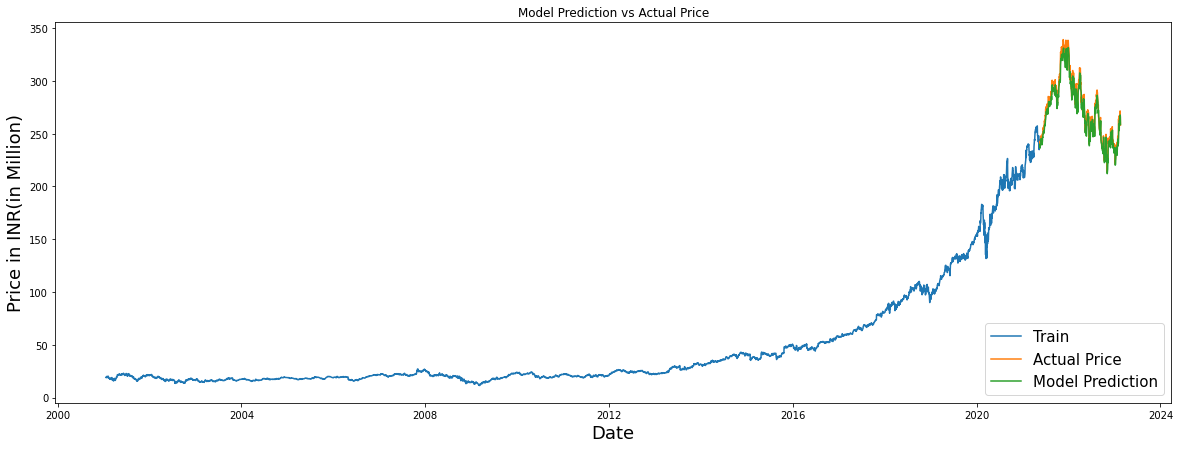

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

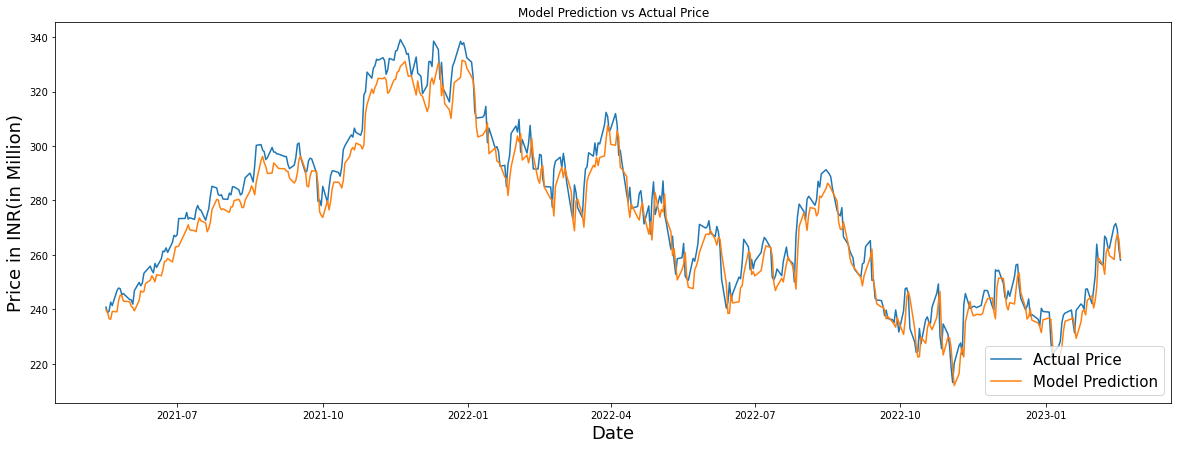

In [ ]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [ ]:
valid_data.head(30)

,Close,predictions
Date,,
2021-05-17 00:00:00-04:00,240.836334,239.874924
2021-05-18 00:00:00-04:00,238.773560,239.021286
2021-05-19 00:00:00-04:00,239.364304,236.572174
2021-05-20 00:00:00-04:00,242.672394,236.372437
2021-05-21 00:00:00-04:00,241.382629,239.242630
2021-05-24 00:00:00-04:00,246.905945,239.122559
2021-05-25 00:00:00-04:00,247.831451,243.264496
2021-05-26 00:00:00-04:00,247.604996,245.183777
2021-05-27 00:00:00-04:00,245.458679,245.083435


In [ ]:
df_test=msft.history(start='2001-01-19', end='2023-02-20', actions=False)

In [ ]:
df_test.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,18.716947,19.165374,18.366004,19.028896,209348800


In [ ]:
df_test.tail(1)

,Open,High,Low,Close,Volume
Date,,,,,
2023-02-17 00:00:00-05:00,259.390015,260.089996,256.0,258.059998,30000100


In [ ]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [ ]:
test_value=df_test[-60:].values

In [ ]:
test_value

array([[244.4178009 ],
       [246.96144104],
       [246.87165833],
       [241.15597534],
       [239.72955322],
       [254.50254822],
       [254.05366516],
       [254.38284302],
       [249.57489014],
       [244.50756836],
       [243.75944519],
       [246.78187561],
       [244.80682373],
       [251.87910461],
       [256.27810669],
       [256.57736206],
       [248.38786316],
       [244.07865906],
       [239.84924316],
       [241.19587708],
       [243.81929016],
       [237.59489441],
       [238.13354492],
       [236.36798096],
       [233.94403076],
       [240.40783691],
       [239.2208252 ],
       [238.98143005],
       [228.52761841],
       [221.75456238],
       [224.36801147],
       [226.55255127],
       [228.27822876],
       [235.18093872],
       [237.91409302],
       [238.6322937 ],
       [239.74951172],
       [235.22084045],
       [231.3505249 ],
       [239.61982727],
       [241.97392273],
       [241.43527222],
       [240.0088501 ],
       [247

In [ ]:
test_value=min_max_scalar.transform(test_value)

In [ ]:
test=[]
test.append(test_value)

In [ ]:
test

[array([[0.71114436],
        [0.71890648],
        [0.7186325 ],
        [0.70119064],
        [0.6968378 ],
        [0.74191876],
        [0.74054896],
        [0.74155347],
        [0.72688163],
        [0.71141829],
        [0.70913534],
        [0.71835852],
        [0.71233149],
        [0.73391312],
        [0.74733702],
        [0.74825022],
        [0.72325932],
        [0.71010944],
        [0.69720305],
        [0.7013124 ],
        [0.70931796],
        [0.69032372],
        [0.69196746],
        [0.6865797 ],
        [0.67918282],
        [0.69890764],
        [0.69528538],
        [0.69455484],
        [0.66265421],
        [0.6419857 ],
        [0.64996084],
        [0.65662714],
        [0.66189318],
        [0.68295734],
        [0.69129778],
        [0.69348943],
        [0.69689871],
        [0.68307911],
        [0.67126853],
        [0.69650296],
        [0.70368667],
        [0.70204294],
        [0.6976901 ],
        [0.72018492],
        [0.72067198],
        [0

In [ ]:
test=np.array(test)

In [ ]:
test

array([[[0.71114436],
        [0.71890648],
        [0.7186325 ],
        [0.70119064],
        [0.6968378 ],
        [0.74191876],
        [0.74054896],
        [0.74155347],
        [0.72688163],
        [0.71141829],
        [0.70913534],
        [0.71835852],
        [0.71233149],
        [0.73391312],
        [0.74733702],
        [0.74825022],
        [0.72325932],
        [0.71010944],
        [0.69720305],
        [0.7013124 ],
        [0.70931796],
        [0.69032372],
        [0.69196746],
        [0.6865797 ],
        [0.67918282],
        [0.69890764],
        [0.69528538],
        [0.69455484],
        [0.66265421],
        [0.6419857 ],
        [0.64996084],
        [0.65662714],
        [0.66189318],
        [0.68295734],
        [0.69129778],
        [0.69348943],
        [0.69689871],
        [0.68307911],
        [0.67126853],
        [0.69650296],
        [0.70368667],
        [0.70204294],
        [0.6976901 ],
        [0.72018492],
        [0.72067198],
        [0

In [ ]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [ ]:
tomorrow_prediction=model.predict(test)

1/1 [==============================] - 0s 46ms/step


In [ ]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [ ]:
tomorrow_prediction[0][0]

253.77118

In [ ]:
model.save("msft_price_prediction.h5")


In [ ]:
company = "MSFT"

In [ ]:
msft = yf.Ticker(company)
df=msft.history(start='2001-01-19', end='2023-02-19', actions=False)
df=df.drop(['Open','High','Volume','Low'],axis=1)
data=df.values
train_len=math.ceil(len(data)*0.92)
min_max_scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=min_max_scalar.fit_transform(data)
train_data=scaled_data[0:train_len,:]
interval=60
x_train=[]
y_train=[]
for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mean_squared_error")
history=model.fit(x_train,y_train,batch_size=64,epochs=40)
test_data=scaled_data[train_len-interval:,:]
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Plotting the required graphs
plt.figure(figsize=(20,7))
plt.title("LSTM Prediction for tomorrow is " + str(t_pred), fontsize=30)
plt.suptitle(company + " Model Prediction vs Actual Price", fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [ ]:
!pip install mpld3

In [ ]:
import mpld3

# Plotting the required graphs
fig = plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.suptitle("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)

# Convert the figure to HTML format
html_fig = mpld3.fig_to_html(fig)

# Save the HTML to a file
with open('graph.html', 'w') as f:
    f.write(html_fig)

#files.download("graph.html")

In [ ]:
df_test=msft.history(start='2001-01-19', end='2023-02-20', actions=False)
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)
test_value=df_test[-60:].values
test_value=min_max_scalar.transform(test_value)
test=[]
test.append(test_value)
test=np.array(test)
test=np.reshape(test,(test.shape[0],test.shape[1],1))
tomorrow_prediction=model.predict(test)
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)
t_pred = tomorrow_prediction[0][0]
print(t_pred)

In [ ]:
def generate_graph(company):
  msft = yf.Ticker(company)
  df=msft.history(start='2001-01-19', end='2023-04-11', actions=False)
  df=df.drop(['Open','High','Volume','Low'],axis=1)
  data=df.values
  train_len=math.ceil(len(data)*0.92)
  min_max_scalar=MinMaxScaler(feature_range=(0,1))
  scaled_data=min_max_scalar.fit_transform(data)
  train_data=scaled_data[0:train_len,:]
  interval=60
  x_train=[]
  y_train=[]
  for i in range(interval,len(train_data)):
      x_train.append(train_data[i-interval:i,0])
      y_train.append(train_data[i,0])
  x_train,y_train=np.array(x_train),np.array(y_train)
  x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  model=Sequential()
  model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
  model.add(LSTM(units=50))
  model.add(Dense(50))
  model.add(Dense(1))
  model.compile(optimizer="adam",loss="mean_squared_error")
  history=model.fit(x_train,y_train,batch_size=64,epochs=20)
  test_data=scaled_data[train_len-interval:,:]
  x_test=[]
  y_test=data[train_len:,:]
  for i in range(interval,len(test_data)):
      x_test.append(test_data[i-interval:i,0])
  x_test=np.array(x_test)
  x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
  predictions=model.predict(x_test)
  predictions=min_max_scalar.inverse_transform(predictions)
  train_data=df[0:train_len]
  valid_data=df[train_len:]
  valid_data['predictions']=predictions

  # Plotting the required graphs
  fig = plt.figure(figsize=(20,7))
  plt.xlabel("Date",fontsize=18)
  plt.ylabel("Price in INR(in Million)",fontsize=18)
  # plt.plot(train_data['Close'])
  plt.plot(valid_data['Close'])
  plt.plot(valid_data['predictions'])
  plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)

  df_test=msft.history(start='2001-01-19', end='2023-04-11', actions=False)
  df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)
  test_value=df_test[-60:].values
  test_value=min_max_scalar.transform(test_value)
  test=[]
  test.append(test_value)
  test=np.array(test)
  test=np.reshape(test,(test.shape[0],test.shape[1],1))
  tomorrow_prediction=model.predict(test)
  tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)
  t_pred = tomorrow_prediction[0][0]

  # Setting the output web page grapf's title and font settings
  plt.title("LSTM Prediction for tomorrow is " + str(t_pred), fontsize=30)
  plt.suptitle(company + " Model Prediction vs Actual Price", fontsize=18)

  # Convert the figure to HTML format
  #html_fig = mpld3.fig_to_html(fig)
  # Save the HTML to a file
  #with open(company + '.png', 'w') as f:
      #f.write(html_fig)
  #files.download(company + ".png")
  return

In [ ]:
pip install mpld3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 5.6 MB/s eta 0:00:00


Epoch 1/20
79/79 [==============================] - 12s 79ms/step - loss: 0.0018
Epoch 2/20
79/79 [==============================] - 7s 93ms/step - loss: 5.9768e-05
Epoch 3/20
79/79 [==============================] - 6s 73ms/step - loss: 6.2232e-05
Epoch 4/20
79/79 [==============================] - 7s 91ms/step - loss: 5.6192e-05
Epoch 5/20
79/79 [==============================] - 6s 78ms/step - loss: 6.7551e-05
Epoch 6/20
79/79 [==============================] - 7s 92ms/step - loss: 6.2711e-05
Epoch 7/20
79/79 [==============================] - 7s 83ms/step - loss: 6.2850e-05
Epoch 8/20
79/79 [==============================] - 8s 100ms/step - loss: 5.7114e-05
Epoch 9/20
79/79 [==============================] - 6s 78ms/step - loss: 5.3402e-05
Epoch 10/20
79/79 [==============================] - 7s 90ms/step - loss: 5.1596e-05
Epoch 11/20
79/79 [==============================] - 6s 75ms/step - loss: 5.4726e-05
Epoch 12/20
79/79 [==============================] - 7s 91ms/step - loss: 5.

<ipython-input-5-230f36367295>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


1/1 [==============================] - 0s 35ms/step


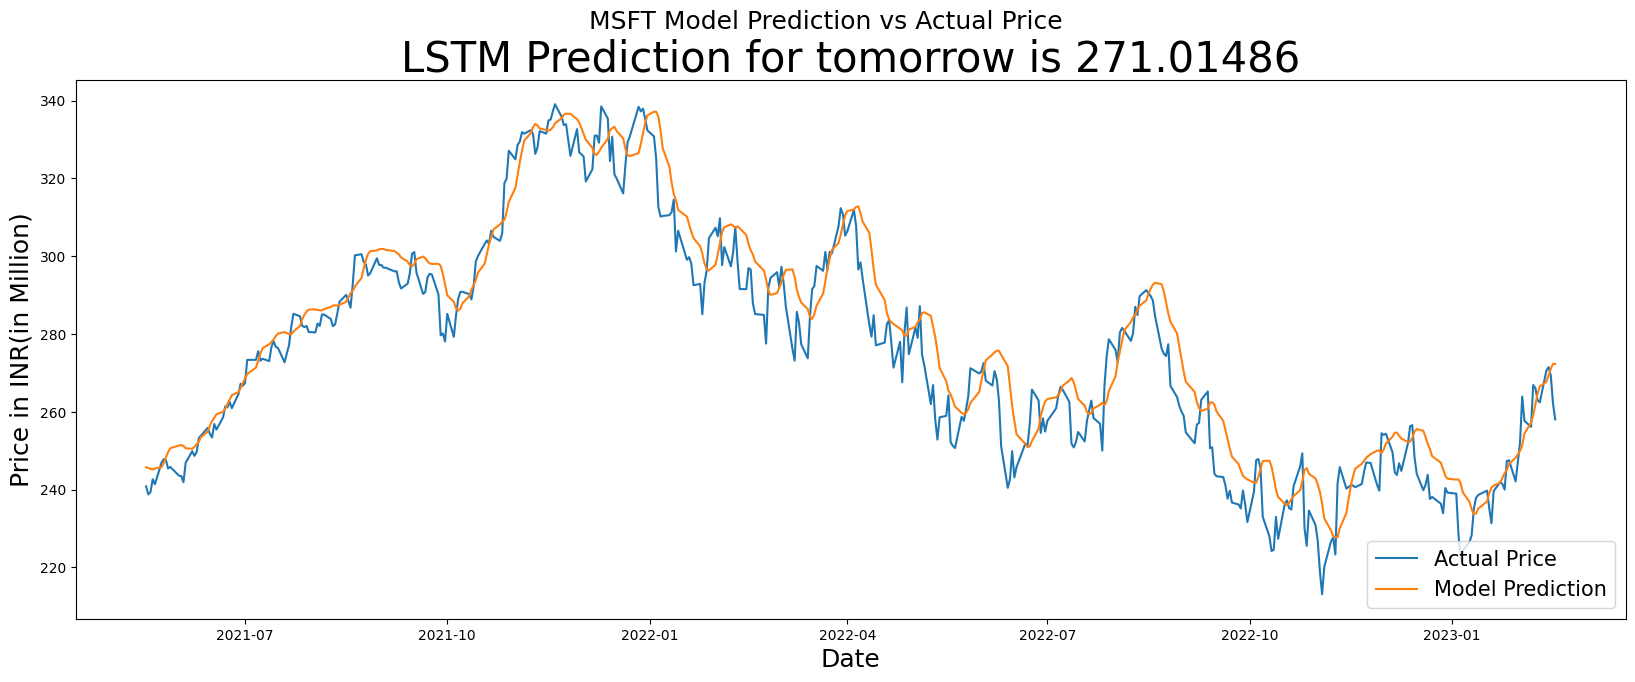

In [ ]:
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import math

import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

import matplotlib.pyplot as plt
from google.colab import files
import mpld3

company = ['MSFT','AMZN','GOOG','IBM']
generate_graph('MSFT')

Epoch 1/20
79/79 [==============================] - 13s 107ms/step - loss: 0.0027
Epoch 2/20
79/79 [==============================] - 7s 88ms/step - loss: 1.2914e-04
Epoch 3/20
79/79 [==============================] - 6s 76ms/step - loss: 1.2290e-04
Epoch 4/20
79/79 [==============================] - 6s 78ms/step - loss: 1.4072e-04
Epoch 5/20
79/79 [==============================] - 6s 81ms/step - loss: 1.3239e-04
Epoch 6/20
79/79 [==============================] - 6s 80ms/step - loss: 1.2133e-04
Epoch 7/20
79/79 [==============================] - 7s 85ms/step - loss: 1.3269e-04
Epoch 8/20
79/79 [==============================] - 7s 92ms/step - loss: 1.2423e-04
Epoch 9/20
79/79 [==============================] - 6s 75ms/step - loss: 1.1206e-04
Epoch 10/20
79/79 [==============================] - 7s 85ms/step - loss: 1.0285e-04
Epoch 11/20
79/79 [==============================] - 6s 75ms/step - loss: 1.0277e-04
Epoch 12/20
79/79 [==============================] - 7s 94ms/step - loss: 8.

<ipython-input-5-230f36367295>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


1/1 [==============================] - 0s 27ms/step


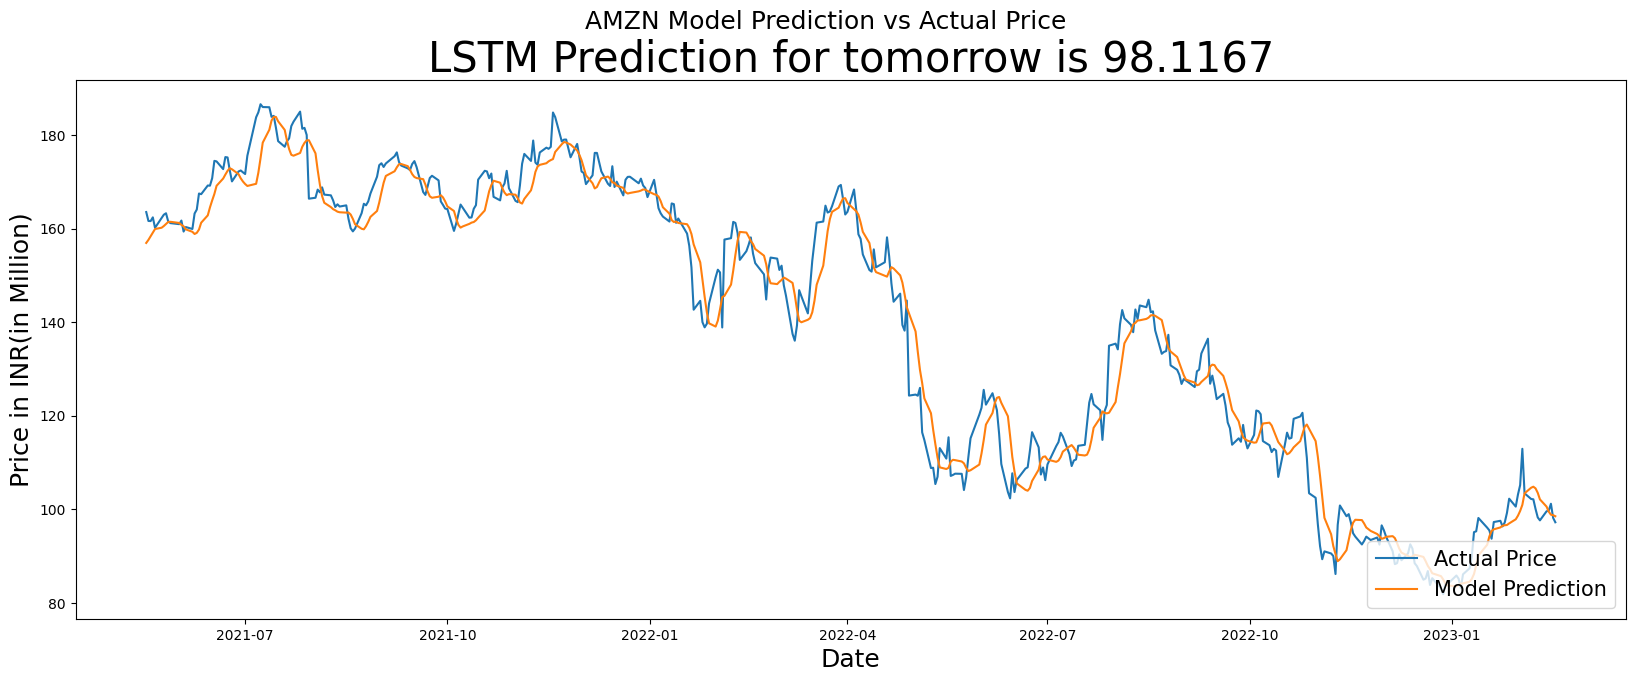

In [ ]:
generate_graph('AMZN')


Epoch 1/20
67/67 [==============================] - 10s 90ms/step - loss: 0.0047
Epoch 2/20
67/67 [==============================] - 5s 76ms/step - loss: 1.2909e-04
Epoch 3/20
67/67 [==============================] - 5s 74ms/step - loss: 1.0948e-04
Epoch 4/20
67/67 [==============================] - 6s 86ms/step - loss: 2.2765e-04
Epoch 5/20
67/67 [==============================] - 5s 79ms/step - loss: 9.7008e-05
Epoch 6/20
67/67 [==============================] - 6s 95ms/step - loss: 9.5349e-05
Epoch 7/20
67/67 [==============================] - 5s 74ms/step - loss: 9.8920e-05
Epoch 8/20
67/67 [==============================] - 6s 88ms/step - loss: 1.7952e-04
Epoch 9/20
67/67 [==============================] - 5s 72ms/step - loss: 8.7498e-05
Epoch 10/20
67/67 [==============================] - 5s 76ms/step - loss: 8.6691e-05
Epoch 11/20
67/67 [==============================] - 6s 88ms/step - loss: 8.3657e-05
Epoch 12/20
67/67 [==============================] - 5s 71ms/step - loss: 9.1

<ipython-input-5-230f36367295>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


1/1 [==============================] - 0s 43ms/step


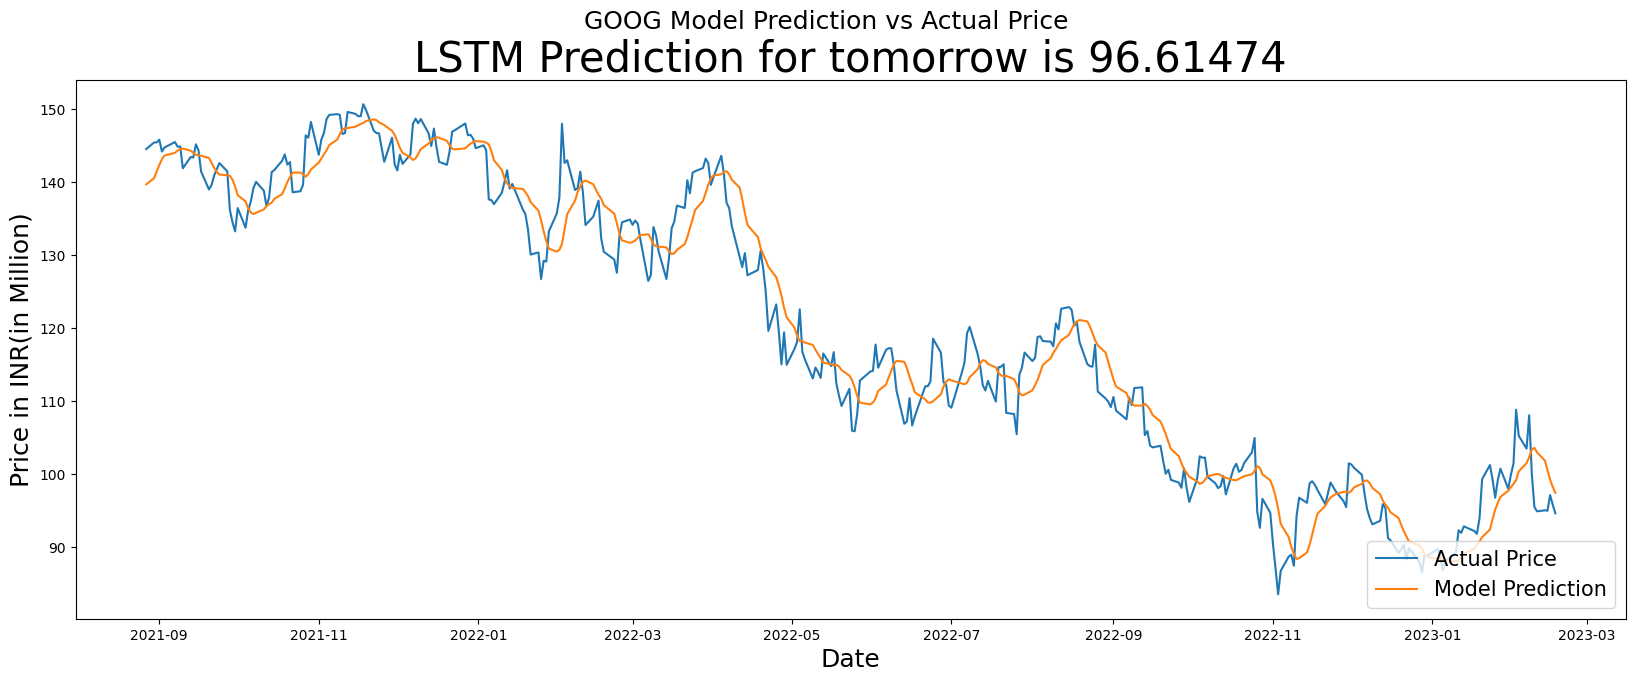

In [ ]:
generate_graph('GOOG')


Epoch 1/20
79/79 [==============================] - 10s 80ms/step - loss: 0.0143
Epoch 2/20
79/79 [==============================] - 6s 75ms/step - loss: 6.5368e-04
Epoch 3/20
79/79 [==============================] - 6s 79ms/step - loss: 6.3266e-04
Epoch 4/20
79/79 [==============================] - 6s 76ms/step - loss: 6.1497e-04
Epoch 5/20
79/79 [==============================] - 6s 82ms/step - loss: 5.8668e-04
Epoch 6/20
79/79 [==============================] - 6s 78ms/step - loss: 5.5818e-04
Epoch 7/20
79/79 [==============================] - 6s 77ms/step - loss: 5.4264e-04
Epoch 8/20
79/79 [==============================] - 7s 85ms/step - loss: 5.0541e-04
Epoch 9/20
79/79 [==============================] - 6s 74ms/step - loss: 4.9272e-04
Epoch 10/20
79/79 [==============================] - 7s 84ms/step - loss: 4.6361e-04
Epoch 11/20
79/79 [==============================] - 6s 74ms/step - loss: 4.1845e-04
Epoch 12/20
79/79 [==============================] - 7s 86ms/step - loss: 4.1

<ipython-input-5-230f36367295>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['predictions']=predictions


1/1 [==============================] - 0s 32ms/step


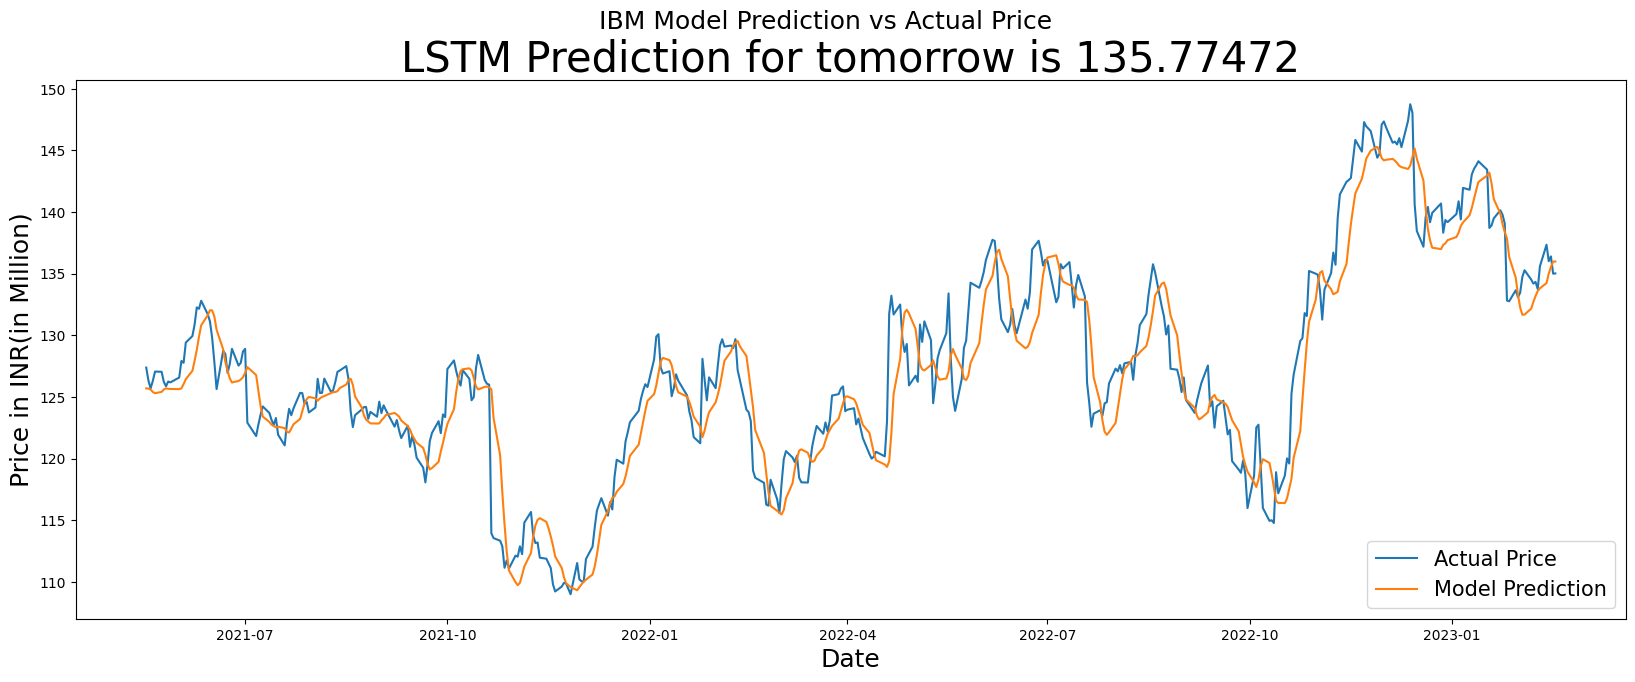

In [ ]:
generate_graph('IBM')